In [2]:
import pandas as pd
import plotly.express as px
idn_movie = pd.read_csv("indonesian_movies.csv", na_values=" ")
idn_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1272 non-null   object 
 1   year          1272 non-null   int64  
 2   description   840 non-null    object 
 3   genre         1236 non-null   object 
 4   rating        376 non-null    object 
 5   users_rating  1272 non-null   float64
 6   votes         1272 non-null   object 
 7   languages     1272 non-null   object 
 8   directors     1265 non-null   object 
 9   actors        1272 non-null   object 
 10  runtime       869 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 109.4+ KB


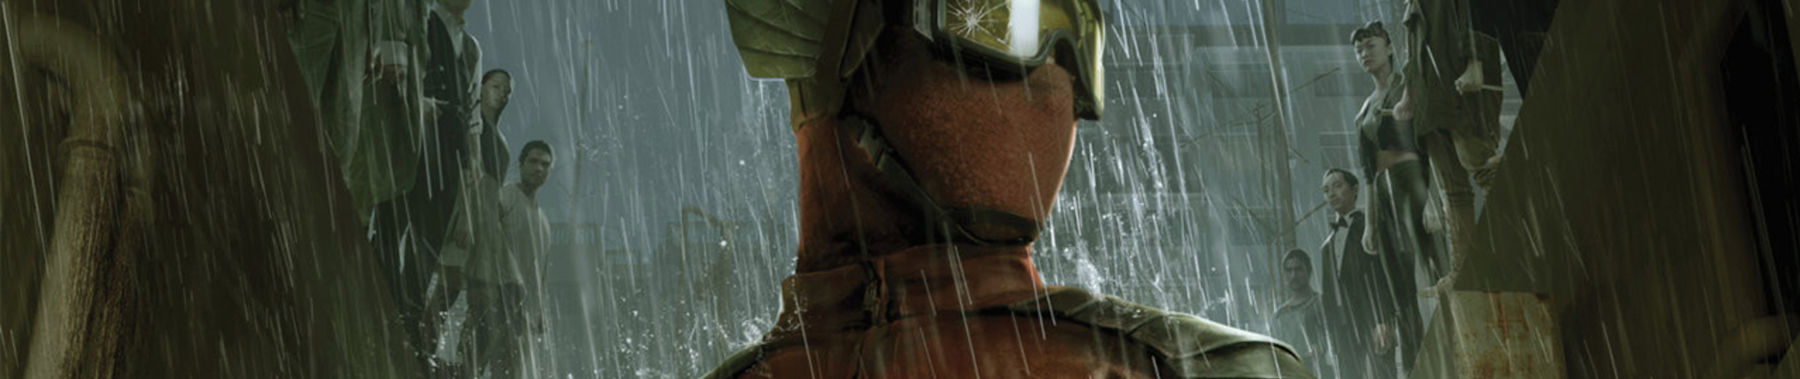

In [ ]:
#info
idn_movie.head(3)

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min


Berdasarkan analisis yang sudah saya lihat ternyata datanya terdapat film dari tahun 1926. Oleh karena itu saya akan menggunakan data fil dari tahun 2017 sampai 2020 saja

In [ ]:
idn_movie[(idn_movie['year'])== 1926]

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
1271,Loetoeng Kasaroeng,1926,NaN,Fantasy,NaN,7.2,11,Indonesian,L. Heuveldorp,"['Martoana', 'Oemar', nan, nan, nan, nan, nan,...",60 min


In [4]:
# menggrubkan berdasarkan tahun
jumlah = idn_movie.groupby(['year']).count()


In [7]:
# hapus data film selain tahun 2017 sampai 2020
idn_movie_drop = idn_movie[(idn_movie['year']) < 2017]

In [8]:
# hapus datanya dan taruh di variabel baru
idn_movie_17_2020 = idn_movie.drop(idn_movie_drop.index)

# validasi lagi bahwa data sudah terhapus
idn_movie_17_2020[(idn_movie_17_2020['year']) > 2017]

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min
...,...,...,...,...,...,...,...,...,...,...,...
223,Tusuk Jelangkung di Lubang Buaya,2018,"Taman Lubang Buaya, famous for its creepiness,...",Horror,13+,2.4,18,Indonesian,Erwin Arnada,"['Nina Kozok', 'Anya Geraldine', 'Rayn Wijaya'...",82 min
224,Udah Putusin Aja!,2018,A moslem girl is caught being pregnant.,Drama,13+,7.3,11,Indonesian,Rolly Subhandani,"['Rizky Mocil', 'Rana Audi Marissa', 'Billy Da...",88 min
225,Wahana Rumah Hantu,2018,NaN,Adventure,13+,2.8,8,Indonesian,Anto Lupus,"['Renald Ramadhan', 'Adzwa Aurelline', 'Nadira...",115 min
226,Wiro Sableng 212,2018,"Indonesia, the 16th century, Wiro Sableng, a d...",Action,13+,7.2,"1,327",Indonesian,Angga Dwimas Sasongko,"['Vino G. Bastian', 'Yayan Ruhian', 'Fariz Alf...",123 min


Data yang tidak relevan, yaitu data dengan tahun rilis sebelum 2017, telah dihapus. Dengan demikian, data yang telah terpilih dapat digunakan untuk tahap analisis selanjutnya.

In [62]:
# rata rata user rating per tahunnya
user_rate_avg = idn_movie_17_2020.groupby(['year']).agg(Rata_rata_rating = ('users_rating','mean'))
user_rate_avg

,Rata_rata_rating
year,
2017,6.559155
2018,6.469072
2019,6.424324
2020,6.645000


In [10]:
pie1 = px.pie(user_rate_avg, values='Rata_rata_rating', names=user_rate_avg.index)

In [11]:
# analisis 2
# rata_rata user rating berdasarkan genrenya >2017
user_rate_avg2 = idn_movie_17_2020.groupby(['genre']).agg(Rata_rata_rating = ('users_rating','mean')).reset_index()
user_rate_avg2 = user_rate_avg2.sort_values(by = 'Rata_rata_rating', ascending = True).reset_index()

In [52]:
user_rate_avg2['Color'] = 'Other'
user_rate_avg2.loc[:1, 'Color'] = 'Bottom'

bar2 = px.bar(
    user_rate_avg2,
    x = 'Rata_rata_rating',
    y = 'genre',
    orientation = 'h',
    color = 'Color',
    color_discrete_map = {
        'Bottom': '#FF6D60',
        'Other': '#87CEEB'
    },
    text_auto = True
)

bar2.update_layout(
    width = 1200,
    height = 600,
    title = '<b>Rata - Rata User Rating Berdasarkan Genre Film Tahun 2018-2020</b>',
    xaxis_title = '',
    yaxis_title = '',
    showlegend = False,
    paper_bgcolor = 'rgb(255, 255, 255, 1)',
    plot_bgcolor = 'rgb(255, 255, 255, 0)',
)




### **Analisis 2**


Berdasarkan grafik, genre History dan Biography memiliki rata-rata rating tertinggi, menunjukkan bahwa film berbasis kisah nyata lebih dihargai oleh penonton. Drama, Comedy, Action, dan Thriller berada di kategori menengah, mencerminkan minat yang stabil terhadap cerita emosional dan hiburan ringan. Sementara itu, Adventure dan Horror memiliki rating terendah, kemungkinan karena variasi kualitas atau ekspektasi penonton yang lebih tinggi terhadap genre ini. Secara keseluruhan, film dengan latar sejarah dan biografi lebih disukai dibandingkan dengan film petualangan dan horor dalam periode 2017-2020.

In [61]:
# anlsis 3
# filter genre horror
horror1 = idn_movie_17_2020[(idn_movie_17_2020['genre']) == 'Horror']
gbhorror = horror1[['title','users_rating','directors']]

maxhistory = gbhorror.sort_values(by = 'users_rating', ascending=True).head(10).reset_index(drop=True)
maxhistory

,title,users_rating,directors
0,Roy Kiyoshi: The Untold Story,2.0,Jose Poernomo
1,Tusuk Jelangkung di Lubang Buaya,2.4,Erwin Arnada
2,The Secret: Suster Ngesot Urban Legend,3.5,Raffi Ahmad
3,12:06 Rumah Kucing,3.5,Chiska Doppert
4,Keluarga Tak Kasat Mata,3.5,Hedy Suryawan
5,Arwah Tumbal Nyai the Trilogy: Part Arwah,3.7,Arie Azis
6,Jailangkung,3.7,Rizal Mantovani
7,Jailangkung 2,4.0,Rizal Mantovani
8,Ruqyah: The Exorcism,4.0,Jose Poernomo
9,Sabrina,4.2,Rocky Soraya


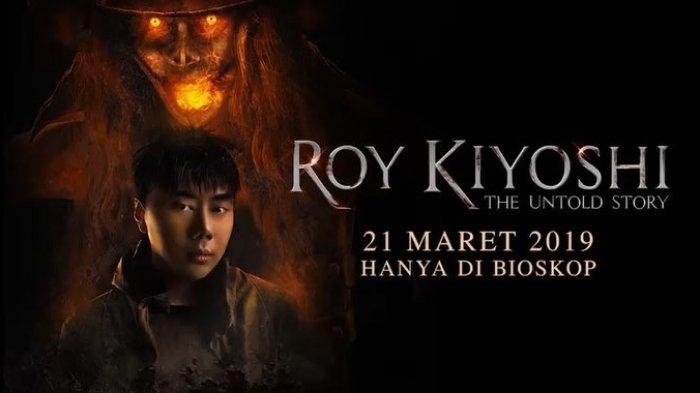

# **Analisis**
Film Roy Kiyoshi: The Untold Story menjadi film genre horror dengan rating terendah di tahun 2018-2020 dengan user rating 2.0

In [55]:
# filter genre horror
horror1 = idn_movie_17_2020[(idn_movie_17_2020['genre']) == 'Horror']
gbhorror = horror1[['title','users_rating','directors']]

maxhistory = gbhorror.sort_values(by = 'users_rating', ascending=False).head(10).reset_index(drop=True)
maxhistory

,title,users_rating,directors
0,Leak (Penangkeb),7.8,Mimi Jegon
1,Tumbal: The Ritual,7.3,NaN
2,MatiAnak,6.9,Derby Romero
3,The Sacred Riana: Beginning,6.9,Billy Christian
4,Jaga Pocong,6.9,Hadrah Daeng Ratu
5,Sakral,6.8,Tema Patrosza
6,Ratu Ilmu Hitam,6.8,Kimo Stamboel
7,Bayi Gaib: Bayi Tumbal Bayi Mati,6.6,Rizal Mantovani
8,Tujuh Bidadari,6.6,Muhammad Yusuf
9,Petak Umpet Minako,6.6,Billy Christian


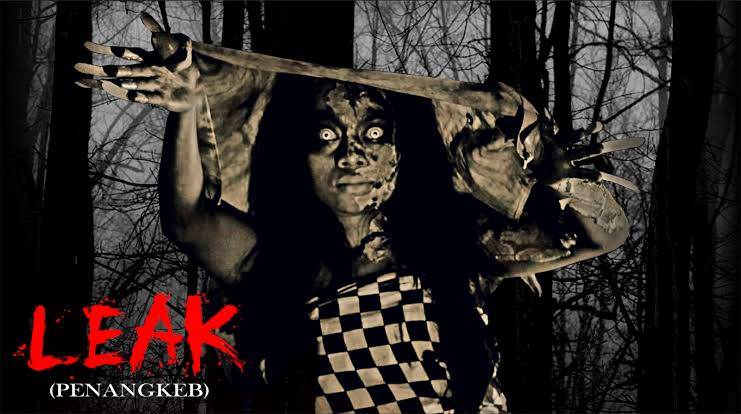

# **Analisis**
Film Leak (Penangkeb) menjadi film genre horror yang rilis tahun 2018-2020 dengan  rating tertinggi dengan user rating 7.8